In [2]:
#defined a collatz function
def collatz(x, steps):
  for i in range(steps):
    if x % 2 == 0:
      x = x // 2
    else:
      x = 3 * x + 1
  print(x)

In [7]:
#tested a few different inputs
collatz(100, 1000)
collatz(100,10)
collatz(561,100)
collatz(10000000000000000000000000000000000000000000000000000000000000000000000000000000, 1000)

1
22
1
719


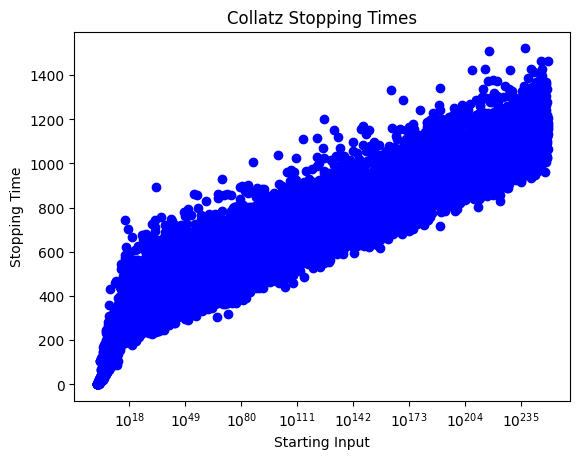

In [13]:
#wanted to explore the trend line of stopping times with large inputs
#evenly sampled numbers to predict trend line

import matplotlib.pyplot as plt
import numpy as np

# Generate more log spaced values up to higher limit
#parameters(0^x, 10^x, number of values log spaced)
inputs = np.logspace(0, 250, num=10000)

stopping_times = []
for x in inputs:
  steps = 0
  n = int(x)

  while n > 1 and steps < 10000000:
    # Increase step limit
    if n % 2 == 0:
      n = n // 2
    else:
      n = 3 * n + 1
    steps += 1

  stopping_times.append(steps)

plt.plot(inputs, stopping_times, 'bo')
plt.xlabel('Starting Input')
plt.ylabel('Stopping Time')
plt.title('Collatz Stopping Times')
plt.xscale('log')
plt.show()

In [ ]:
#the trend seems to be steadily increasing for the stopping time as the numbers increase

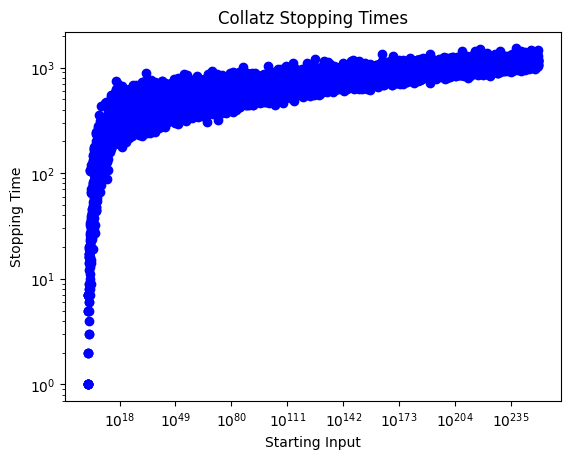

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Generate more log-spaced values up to a higher limit
inputs = np.logspace(0, 250, num=10000)  # Adjust the upper limit as needed

stopping_times = []
for x in inputs:
    steps = 0
    n = int(x)

    while n > 1 and steps < 10000000:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        steps += 1

    stopping_times.append(steps)

plt.plot(inputs, stopping_times, 'bo')
plt.xlabel('Starting Input')
plt.ylabel('Stopping Time')
plt.title('Collatz Stopping Times')
plt.xscale('log')
plt.yscale('log')  # Use log scale for both axes for better visualization
plt.show()


<ipython-input-79-c2861373b9f3>:25: RuntimeWarning: divide by zero encountered in log
  y = np.log(stopping_times)


Linear Function: log(y) = 0.0028 * log(x) + 5.6686


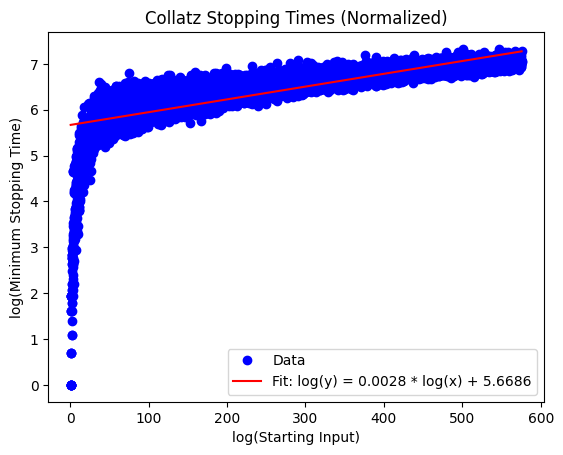

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Generate more log-spaced values up to a higher limit
inputs = np.logspace(0, 250, num=10000)

stopping_times = []
for x in inputs:
    steps = 0
    n = int(x)

    while n > 1 and steps < 10000000:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        steps += 1

    stopping_times.append(steps)

# Normalize the data
X = np.log(inputs.reshape(-1, 1))  # Log-transform the input for better performance
y = np.log(stopping_times)

# Filter out infinite or too large values in y
valid_indices = np.isfinite(y)
X_valid = X[valid_indices]
y_valid = y[valid_indices]

# Fit the linear regression model
model = LinearRegression()
model.fit(X_valid, y_valid)

# Print the linear function
a, b = model.coef_[0], model.intercept_
print(f'Linear Function: log(y) = {a:.4f} * log(x) + {b:.4f}')

# Plot the data and the fitted function
plt.plot(X_valid, y_valid, 'bo', label='Data')
plt.plot(X_valid, model.predict(X_valid), 'r-', label=f'Fit: log(y) = {a:.4f} * log(x) + {b:.4f}')
plt.xlabel('log(Starting Input)')
plt.ylabel('log(Minimum Stopping Time)')
plt.title('Collatz Stopping Times (Normalized)')
plt.legend()
plt.show()


In [21]:
#Linear Function: log(y) = 0.0028 * log(x) + 5.6686
#I raised e to the power of this function
#Getting y = 289.629x^(0.0028)
#using the collatz function I made earlier and this formula it seems to suffcient
#to get an approxmiation of the number of steps it takes for that value to get to 1

In [28]:
#validating the approximate formula
print(pow((16000), 0.0028) * 289.629)
collatz(16000,297)

print(pow((50000000000000000), 0.0028) * 289.629)
collatz(50000000000000000,322)

297.586743365226
2
322.5515704876195
4


Number with the largest stopping time: 6.09e+249, Stopping Time: 7719


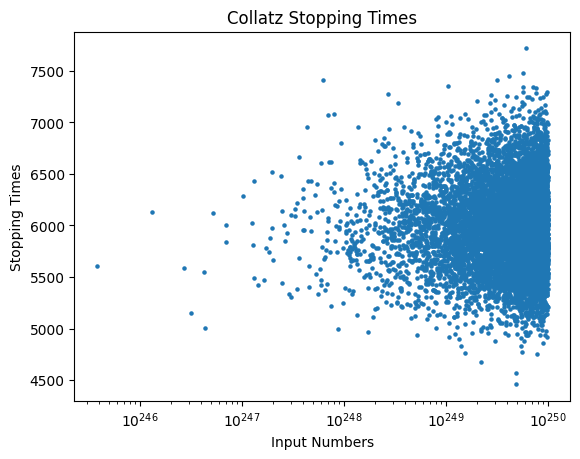

In [43]:
import matplotlib.pyplot as plt
import random

def collatz_stopping_time(n):
    steps = 0
    while n > 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        steps += 1
    return steps

def generate_stopping_times_and_numbers(start, end, sample_size):
    stopping_times = []
    numbers = []
    for _ in range(sample_size):
        i = random.randint(start, end)
        numbers.append(i)
        stopping_times.append(collatz_stopping_time(i))
    return numbers, stopping_times

def plot_stopping_times(numbers, stopping_times):
    plt.scatter(numbers, stopping_times, s=5)  # s parameter adjusts marker size
    plt.xlabel('Input Numbers')
    plt.ylabel('Stopping Times')
    plt.title('Collatz Stopping Times')
    plt.xscale('log')
    plt.show()

# Set the range of numbers (adjust as needed)
start_number = 1
end_number = 10**250  # You can increase this to 10**250, but be cautious of computational resources
sample_size = 10000  # Adjust the sample size for plotting

# Generate input numbers and their corresponding stopping times
numbers_data, stopping_times_data = generate_stopping_times_and_numbers(start_number, end_number, sample_size)

# Find the index of the maximum stopping time
max_index = stopping_times_data.index(max(stopping_times_data))

# Retrieve the corresponding number
number_with_largest_stopping_time = numbers_data[max_index]

# Print the result in scientific notation
print(f"Number with the largest stopping time: {format(number_with_largest_stopping_time, '.2e')}, Stopping Time: {max(stopping_times_data)}")

# Plot the input numbers against stopping times
plot_stopping_times(numbers_data, stopping_times_data)


In [ ]:
#it seems that once you randomly sample starting values you get more diversity in the
#types of stopping times versus when you log space them
#the above formula seems to work on most values, but it
#seems that there can be jumps in between the starting values

Number with the largest stopping time: 4.59e+248, Stopping Time: 1625


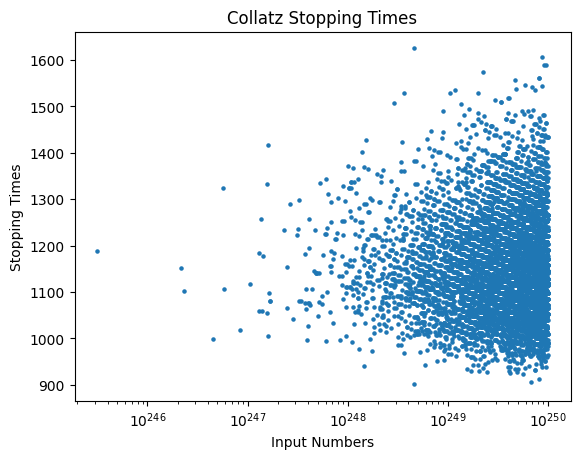

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def collatz_stopping_time(n):
    steps = 0
    while n > 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        steps += 1
    return steps

def generate_stopping_times_and_numbers(start, end, sample_size):
    stopping_times = []
    numbers = []

    # Create 100 evenly spaced bins
    bins = np.linspace(start, end, 10)

    # Take samples from each bin
    for _ in range(sample_size):
        bin_index = np.random.randint(0, len(bins) - 1)
        bin_start, bin_end = bins[bin_index], bins[bin_index + 1]
        i = random.uniform(bin_start, bin_end)
        numbers.append(i)
        stopping_times.append(collatz_stopping_time(int(i)))

    return numbers, stopping_times

def plot_stopping_times(numbers, stopping_times):
    plt.scatter(numbers, stopping_times, s=5)  # s parameter adjusts marker size
    plt.xlabel('Input Numbers')
    plt.ylabel('Stopping Times')
    plt.title('Collatz Stopping Times')
    plt.xscale('log')
    plt.show()

# Set the range of numbers (adjust as needed)
start_number = 1
end_number = 10**250  # You can increase this to 10**250, but be cautious of computational resources
sample_size = 10000  # Adjust the sample size for plotting

# Generate input numbers and their corresponding stopping times
numbers_data, stopping_times_data = generate_stopping_times_and_numbers(start_number, end_number, sample_size)

# Find the index of the maximum stopping time
max_index = stopping_times_data.index(max(stopping_times_data))

# Retrieve the corresponding number
number_with_largest_stopping_time = numbers_data[max_index]

# Print the result in scientific notation
print(f"Number with the largest stopping time: {format(number_with_largest_stopping_time, '.2e')}, Stopping Time: {max(stopping_times_data)}")

# Plot the input numbers against stopping times
plot_stopping_times(numbers_data, stopping_times_data)


In [ ]:
#in the above code i evenly spaced the number of actual input numbers
# over the entire range and it
#seems to be less common to get high stopping times in this format

In [41]:
#validating a very large number
collatz(284928142868174931594866832203106328664855594170996673
        958583446122554296959431235042101810687618631149005250
        537171283253851537690751300092462932155484718397287900
        836965244164508511569961871908510700272811740521863213
        9797509030137611250355490844316923, 7500)

1


Largest Stopping Time: 1521
Starting Value (Scientific Notation): 3.75e+237


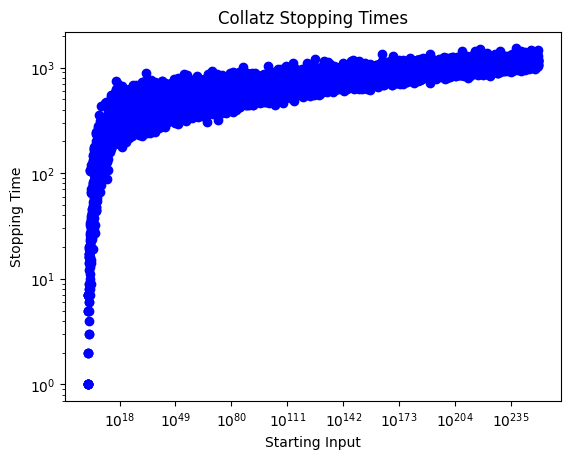

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate more log-spaced values up to a higher limit
inputs = np.logspace(0, 250, num=10000)  # Adjust the upper limit as needed

largest_stopping_time = 0  # Initialize the largest stopping time across all inputs
largest_stopping_time_input = 0  # Initialize the starting input for the largest stopping time

stopping_times = []
for x in inputs:
    steps = 0
    n = int(x)

    while n > 1 and steps < 10000000:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        steps += 1

    stopping_times.append(steps)

    # Update the largest stopping time across all inputs
    if steps > largest_stopping_time:
        largest_stopping_time = steps
        largest_stopping_time_input = x

plt.plot(inputs, stopping_times, 'bo')
plt.xlabel('Starting Input')
plt.ylabel('Stopping Time')
plt.title('Collatz Stopping Times')
plt.xscale('log')
plt.yscale('log')  # Use log scale for both axes for better visualization

# Print the largest stopping time and the corresponding starting value in scientific notation
print(f"Largest Stopping Time: {largest_stopping_time}")
print(f"Starting Value (Scientific Notation): {format(largest_stopping_time_input, '.2e')}")

plt.show()


In [ ]:
#used this code again to see if there is a difference, and there is not
#when you evenly sample random input numbers you tend to get lower stopping times
#versus when you randomly sample them

In [ ]:
#the stopping times are not that predictable, there seems to be large discrepancies
#between the input values and actual values
#possibly two different distributions of stopping times for close input numbers

Number with the largest stopping time: 8.40e+06, Stopping Time: 685


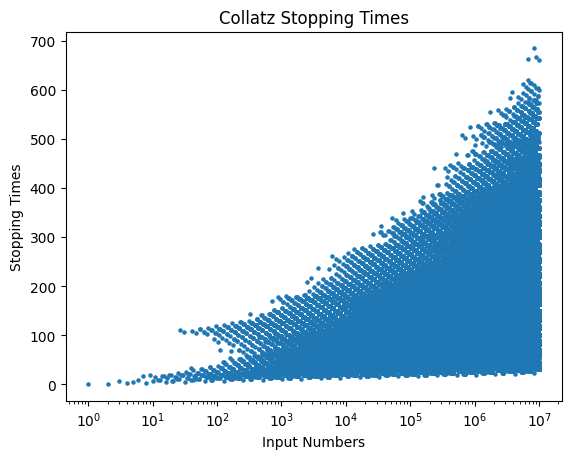

In [52]:
import matplotlib.pyplot as plt
import numpy as np

def collatz_stopping_time(n):
    steps = 0
    while n > 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        steps += 1
    return steps

def generate_stopping_times_and_numbers(start, end):
    stopping_times = []
    numbers = []

    for i in range(start, end + 1):
        numbers.append(i)
        stopping_times.append(collatz_stopping_time(i))

    return numbers, stopping_times

def plot_stopping_times(numbers, stopping_times):
    plt.scatter(numbers, stopping_times, s=5)  # s parameter adjusts marker size
    plt.xlabel('Input Numbers')
    plt.ylabel('Stopping Times')
    plt.title('Collatz Stopping Times')
    plt.xscale('log')
    plt.show()

# Set the range of numbers (adjust as needed)
start_number = 1
end_number = 10**7  # Adjust the end number as needed

# Generate input numbers and their corresponding stopping times
numbers_data, stopping_times_data = generate_stopping_times_and_numbers(start_number, end_number)

# Find the index of the maximum stopping time
max_index = stopping_times_data.index(max(stopping_times_data))

# Retrieve the corresponding number
number_with_largest_stopping_time = numbers_data[max_index]

# Print the result in scientific notation
print(f"Number with the largest stopping time: {format(number_with_largest_stopping_time, '.2e')}, Stopping Time: {max(stopping_times_data)}")

# Plot the input numbers against stopping times
plot_stopping_times(numbers_data, stopping_times_data)


In [ ]:
#